In this  I have found  meteorological data for 10 cities of Maharashtra State. I  have taken dataset of 8 days  each day has 24 reading  for analysis, perform data. I have performed this  analysis for testing the (given) Hypothesis ( The Influence of the Proximity of the Sea)

I have taken 10 cities within the distance of 400 km from sea

the 10 cities are with distances
MUMBAI              0 km 
PUNE                150 km
NASHIK              170 km
NAVI MUMBAI         25 km
VASAI - VIRAR       60 km
PANVEL              35 km
AURANGABAD          340 km  
BHIWANDI            34 km 
KOLHPUR             380 km
DHULE               320 km

In [197]:
#imported all important datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.model_selection import train_test_split

In [198]:
#read csv file 
data = pd.read_csv("mumbai.csv") 

In [199]:
data


,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea [km]
0,06/06/19,00:00:00,28.20,86,0.1,10.46,243.43,0
1,06/06/19,01:00:00,28.11,85,0.0,10.31,245.22,0
2,06/06/19,02:00:00,27.97,87,0.1,9.98,244.36,0
3,06/06/19,03:00:00,27.80,89,0.1,9.50,245.38,0
4,06/06/19,04:00:00,27.68,89,0.1,8.89,248.63,0
5,06/06/19,05:00:00,27.58,88,0.1,8.12,257.20,0
6,06/06/19,06:00:00,27.60,86,0.0,7.64,261.87,0
7,06/06/19,07:00:00,28.12,82,0.0,7.86,254.05,0
8,06/06/19,08:00:00,28.86,79,0.0,9.51,240.52,0
9,06/06/19,09:00:00,29.16,78,0.0,10.38,236.31,0


In [200]:
type(data["Hour"])

pandas.core.series.Series

In [201]:
#changed to timpstamp
data['Hour'] = pd.to_datetime(data['Hour'])

In [202]:
type(data["Hour"])


 

pandas.core.series.Series

In [203]:
data['Year'] = pd.to_datetime(data['Year'])


In [204]:
#changed to time stamp but only kept hour field
time=data["Hour"].iloc[0]
time.hour



0

In [205]:
data["Hour"]=data["Hour"].apply(lambda time:time.hour)

In [206]:
#read csv file 

data1 = pd.read_csv("pune.csv") 

In [207]:
#changed to timpstamp
data1['Hour'] = pd.to_datetime(data1['Hour'])
data1['Year'] = pd.to_datetime(data1['Year'])
time1=data1["Hour"].iloc[0]
time1.hour

data1["Hour"]=data1["Hour"].apply(lambda time1:time1.hour)#changed to time stamp but only kept hour field


In [208]:
data1


,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea[km]
0,2019-06-06,0,24.21,90,0.0,23.42,272.64,150
1,2019-06-06,1,24.04,90,0.0,23.76,270.87,150
2,2019-06-06,2,23.66,89,0.0,23.40,270.88,150
3,2019-06-06,3,23.42,90,0.0,22.68,270.91,150
4,2019-06-06,4,23.66,91,0.0,22.37,273.69,150
5,2019-06-06,5,22.99,91,0.0,21.67,274.76,150
6,2019-06-06,6,23.10,86,0.0,20.16,270.00,150
7,2019-06-06,7,25.67,69,0.0,23.04,270.00,150
8,2019-06-06,8,28.40,57,0.0,24.12,270.86,150
9,2019-06-06,9,30.56,48,0.0,23.98,277.77,150


In [209]:
data2 = pd.read_csv("nashik.csv") #read csv file

In [210]:
data2


,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea [km]
0,06/06/19,00:00:00,24.76,82,0.0,18.53,262.18,170
1,06/06/19,01:00:00,24.18,81,0.0,18.89,262.33,170
2,06/06/19,02:00:00,23.61,80,0.0,18.94,261.25,170
3,06/06/19,03:00:00,23.00,81,0.0,18.29,259.80,170
4,06/06/19,04:00:00,22.65,83,0.0,17.82,261.87,170
5,06/06/19,05:00:00,22.87,88,0.0,16.95,266.35,170
6,06/06/19,06:00:00,23.67,90,0.0,17.28,268.81,170
7,06/06/19,07:00:00,26.11,77,0.0,21.25,268.06,170
8,06/06/19,08:00:00,29.06,59,0.0,21.97,271.88,170
9,06/06/19,09:00:00,31.97,46,0.0,22.46,276.44,170


In [211]:

data2['Hour'] = pd.to_datetime(data2['Hour'])#chaniging to timpstamp
data2['Year'] = pd.to_datetime(data2['Year'])
time2=data2['Hour'].iloc[0]
time2.hour

data2['Hour']=data2['Hour'].apply(lambda time2:time2.hour)#changed to time stamp but only kept hour field


In [212]:
data2


,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea [km]
0,2019-06-06,0,24.76,82,0.0,18.53,262.18,170
1,2019-06-06,1,24.18,81,0.0,18.89,262.33,170
2,2019-06-06,2,23.61,80,0.0,18.94,261.25,170
3,2019-06-06,3,23.00,81,0.0,18.29,259.80,170
4,2019-06-06,4,22.65,83,0.0,17.82,261.87,170
5,2019-06-06,5,22.87,88,0.0,16.95,266.35,170
6,2019-06-06,6,23.67,90,0.0,17.28,268.81,170
7,2019-06-06,7,26.11,77,0.0,21.25,268.06,170
8,2019-06-06,8,29.06,59,0.0,21.97,271.88,170
9,2019-06-06,9,31.97,46,0.0,22.46,276.44,170


In [213]:
data4 = pd.read_csv("navi_mumbai.csv") #read csv file

In [214]:
data4['Hour'] = pd.to_datetime(data4['Hour'])#chaniging to timpstamp
data4['Year'] = pd.to_datetime(data4['Year'])
time4=data4['Hour'].iloc[0]
time4.hour

data4['Hour']=data4['Hour'].apply(lambda time4:time4.hour)#changed to time stamp but only kept hour field

In [215]:
data4

,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea [km]
0,2019-06-06,0,27.82,90,0.2,9.59,235.71,25
1,2019-06-06,1,27.70,91,0.2,9.09,236.31,25
2,2019-06-06,2,27.57,91,0.1,9.09,236.31,25
3,2019-06-06,3,27.53,92,0.0,8.50,233.62,25
4,2019-06-06,4,27.53,92,0.0,7.70,232.59,25
5,2019-06-06,5,27.50,92,0.0,6.70,233.75,25
6,2019-06-06,6,27.53,91,0.0,6.19,234.46,25
7,2019-06-06,7,27.88,88,0.0,7.70,232.59,25
8,2019-06-06,8,28.47,83,0.0,10.51,231.95,25
9,2019-06-06,9,29.37,77,0.0,11.89,234.87,25


In [216]:
data5 = pd.read_csv("pan.csv") #read csv file

In [217]:
data5

,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea [km]
0,06/06/19,00:00:00,27.72,90,0.2,10.63,241.70,35
1,06/06/19,01:00:00,27.57,90,0.1,10.14,242.53,35
2,06/06/19,02:00:00,27.50,90,0.1,9.20,239.42,35
3,06/06/19,03:00:00,27.52,91,0.0,8.40,239.04,35
4,06/06/19,04:00:00,27.51,92,0.0,7.79,236.31,35
5,06/06/19,05:00:00,27.48,92,0.0,6.61,240.64,35
6,06/06/19,06:00:00,27.53,92,0.1,6.30,239.04,35
7,06/06/19,07:00:00,28.00,88,0.1,7.79,236.31,35
8,06/06/19,08:00:00,28.62,82,0.0,10.09,235.18,35
9,06/06/19,09:00:00,29.91,74,0.0,10.99,238.39,35


In [218]:
data5['Hour'] = pd.to_datetime(data5['Hour'])#read csv file
data5['Year'] = pd.to_datetime(data5['Year'])#chaniging to timpstamp
time5=data5["Hour"].iloc[0]
time5.hour
data5["Hour"]=data5["Hour"].apply(lambda time5:time5.hour)#changed to time stamp but only kept hour field


In [219]:
data6 = pd.read_csv("vasai.csv") #read csv file

In [220]:
data6['Hour'] = pd.to_datetime(data6['Hour'])#read csv file
data6['Year'] = pd.to_datetime(data6['Year'])#chaniging to timpstamp
time6=data6["Hour"].iloc[0]
time6.hour

data6["Hour"]=data6["Hour"].apply(lambda time6:time6.hour)#changed to time stamp but only kept hour field


In [221]:
data6

,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea[km]
0,2019-06-06,0,27.67,91,0.0,10.19,237.99,60
1,2019-06-06,1,27.38,91,0.0,10.32,240.75,60
2,2019-06-06,2,27.15,90,0.0,10.46,243.43,60
3,2019-06-06,3,27.07,90,0.0,10.95,242.59,60
4,2019-06-06,4,27.10,91,0.0,9.98,244.36,60
5,2019-06-06,5,27.15,92,0.1,8.09,249.15,60
6,2019-06-06,6,27.22,91,0.1,6.73,254.48,60
7,2019-06-06,7,27.67,88,0.2,7.17,252.47,60
8,2019-06-06,8,28.30,84,0.2,8.37,244.54,60
9,2019-06-06,9,28.89,81,0.1,10.46,243.43,60


In [222]:

data7 = pd.read_csv("aurangabad.csv") #read csv file
data7['Hour'] = pd.to_datetime(data7['Hour'])
data7['Year'] = pd.to_datetime(data7['Year'])#chaniging to timpstamp
time7=data7["Hour"].iloc[0]
time7.hour

data7["Hour"]=data7["Hour"].apply(lambda time7:time7.hour)#changed to time stamp but only kept hour field


In [223]:
data7

,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea [km]
0,2019-06-06,0,31.09,46,0.0,21.67,302.11,340
1,2019-06-06,1,30.12,48,0.0,19.58,302.23,340
2,2019-06-06,2,28.99,54,0.0,18.17,303.69,340
3,2019-06-06,3,27.91,59,0.0,18.08,305.27,340
4,2019-06-06,4,27.00,62,0.0,17.87,304.33,340
5,2019-06-06,5,26.36,61,0.0,17.79,305.94,340
6,2019-06-06,6,26.72,55,0.0,19.88,305.42,340
7,2019-06-06,7,29.15,44,0.0,23.11,307.41,340
8,2019-06-06,8,32.42,36,0.0,23.69,313.15,340
9,2019-06-06,9,35.94,27,0.0,23.62,322.43,340


In [224]:

data8 = pd.read_csv("bhiwandi.csv") #read csv file
data8['Hour'] = pd.to_datetime(data8['Hour'])
data8['Year'] = pd.to_datetime(data8['Year'])#chaniging to timpstamp
time8=data8["Hour"].iloc[0]
time8.hour

data8["Hour"]=data8["Hour"].apply(lambda time8:time8.hour)


In [225]:
data8

,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea[km]
0,2019-06-06,0,28.02,88,0.2,9.22,231.34,34
1,2019-06-06,1,27.89,89,0.2,9.22,231.34,34
2,2019-06-06,2,27.70,88,0.0,9.50,232.70,34
3,2019-06-06,3,27.66,89,0.0,9.29,234.46,34
4,2019-06-06,4,27.56,90,0.1,8.29,235.62,34
5,2019-06-06,5,27.53,90,0.1,6.79,237.99,34
6,2019-06-06,6,27.58,90,0.1,5.69,235.30,34
7,2019-06-06,7,28.02,87,0.1,6.37,227.29,34
8,2019-06-06,8,28.65,82,0.1,8.94,229.90,34
9,2019-06-06,9,29.64,76,0.0,11.81,232.43,34


In [226]:

data9 = pd.read_csv("kolhapur.csv") #read csv file


data9['Hour'] = pd.to_datetime(data9['Hour'])#chaniging to timpstamp
data9['Year'] = pd.to_datetime(data9['Year'])
time9=data9["Hour"].iloc[0]
time9.hour

data9["Hour"]=data9["Hour"].apply(lambda time9:time9.hour)#only to dipaly hour in timestamp

In [227]:
data9

,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],Distance from sea [km]
0,2019-06-06,0,24.43,85,0.0,19.49,265.76,380.0
1,2019-06-06,1,24.57,83,0.0,19.88,264.81,380.0
2,2019-06-06,2,23.95,86,0.0,18.36,270.00,380.0
3,2019-06-06,3,23.91,86,0.0,17.06,277.28,380.0
4,2019-06-06,4,23.69,85,0.0,15.89,283.09,380.0
5,2019-06-06,5,23.46,84,0.0,16.62,274.97,380.0
6,2019-06-06,6,23.70,83,0.0,19.30,261.42,380.0
7,2019-06-06,7,25.20,78,0.0,19.08,270.00,380.0
8,2019-06-06,8,26.93,70,0.0,18.49,276.71,380.0
9,2019-06-06,9,28.71,63,0.0,17.77,276.98,380.0


In [228]:

data10 = pd.read_csv("dhule.csv") #read csv file
data10['Hour'] = pd.to_datetime(data10['Hour'])#chaniging to timpstamp
data10['Year'] = pd.to_datetime(data10['Year'])
time10=data10["Hour"].iloc[0]
time10.hour

data10["Hour"]=data10["Hour"].apply(lambda time10:time10.hour)#only to dipaly hour in timestamp

In [229]:
data10

,Year,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea[km]
0,2019-06-06,0,32.01,41,0.0,20.27,289.72,320
1,2019-06-06,1,31.12,42,0.0,18.92,291.19,320
2,2019-06-06,2,30.34,42,0.0,17.31,286.93,320
3,2019-06-06,3,29.80,40,0.0,16.33,284.04,320
4,2019-06-06,4,29.40,38,0.0,15.73,285.95,320
5,2019-06-06,5,28.67,45,0.0,15.48,287.59,320
6,2019-06-06,6,28.66,52,0.0,16.74,288.82,320
7,2019-06-06,7,30.63,46,0.0,18.06,293.50,320
8,2019-06-06,8,33.72,35,0.0,19.34,298.95,320
9,2019-06-06,9,36.85,27,0.0,22.55,308.52,320


In [230]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [231]:
print(data10.shape)

(192, 8)


In [232]:
byMonth10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 6 columns):
Temperature  [2 m above gnd]                    24 non-null float64
Relative Humidity  [2 m above gnd]              24 non-null float64
Total Precipitation (high resolution)  [sfc]    24 non-null float64
Wind Speed  [10 m above gnd]                    24 non-null float64
Wind Direction  [10 m above gnd]                24 non-null float64
distance from sea[km]                           24 non-null float64
dtypes: float64(6)
memory usage: 1.3 KB


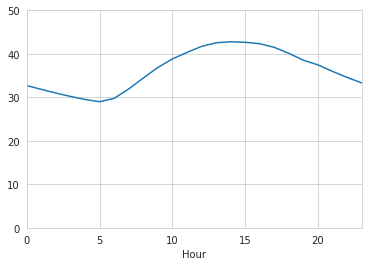

In [233]:
plt.axis([0, 23, 0, 50])
byMonth10 = data10.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth10 #and grouped them together on the basis of hour
byMonth10['Temperature  [2 m above gnd]'].plot()


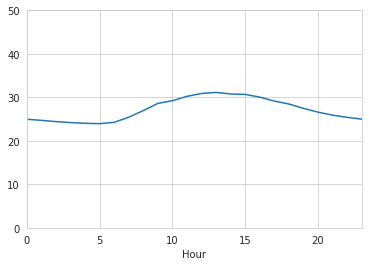

In [234]:
plt.axis([0, 23, 0, 50])
byMonth9 = data9.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth9 #and grouped them together on the basis of hour
byMonth9['Temperature  [2 m above gnd]'].plot()


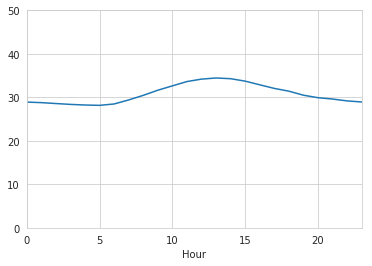

In [235]:
plt.axis([0, 23, 0, 50])
byMonth8 = data8.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth8 #and grouped them together on the basis of hour
byMonth8['Temperature  [2 m above gnd]'].plot()

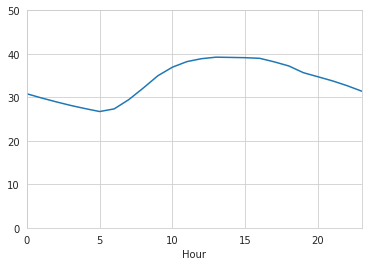

In [236]:
plt.axis([0, 23, 0, 50])
byMonth7 = data7.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth7 #and grouped them together on the basis of hour
byMonth7['Temperature  [2 m above gnd]'].plot()


In [237]:
byMonth7

,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],distance from sea [km]
Hour,,,,,,
0,30.81875,47.750,0.0000,18.38750,272.30000,340.0
1,29.86375,51.625,0.0000,17.52875,270.02250,340.0
2,28.98000,56.000,0.0000,17.37625,268.25250,340.0
3,28.14750,60.625,0.0000,17.74875,267.11375,340.0
4,27.41375,64.625,0.0000,18.52000,267.01875,340.0
5,26.73500,67.750,0.0000,19.18000,266.97750,340.0
6,27.34250,64.250,0.0000,15.54375,260.01875,340.0
7,29.46000,55.250,0.0000,18.38250,267.46500,340.0
8,32.13875,45.500,0.0000,18.97375,277.08625,340.0


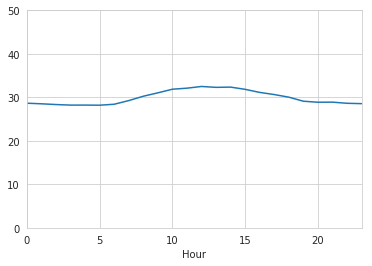

In [238]:
plt.axis([0, 23, 0, 50])
byMonth6 = data6.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth6 #and grouped them together on the basis of hour
byMonth6['Temperature  [2 m above gnd]'].plot()


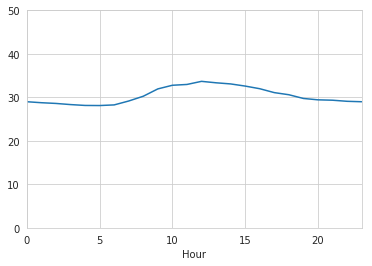

In [239]:
plt.axis([0, 23, 0, 50])
byMonth5 = data5.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth5 #and grouped them together on the basis of hour
byMonth5['Temperature  [2 m above gnd]'].plot()

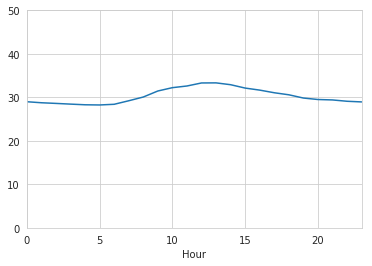

In [240]:
plt.axis([0, 23, 0, 50])
byMonth4 = data4.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth4 #and grouped them together on he basis of hour
byMonth4['Temperature  [2 m above gnd]'].plot()


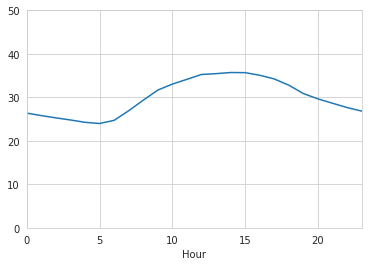

In [241]:
plt.axis([0, 23, 0, 50])
byMonth2 = data2.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth2 #and grouped them together on the basis of hour
byMonth2['Temperature  [2 m above gnd]'].plot()



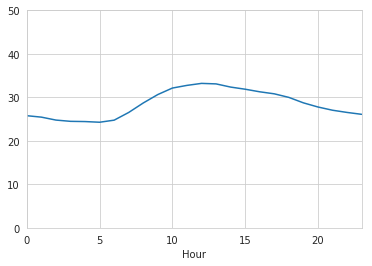

In [242]:
plt.axis([0, 23, 0, 50])
byMonth1 = data1.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth1 #and grouped them together on the basis of hour
byMonth1['Temperature  [2 m above gnd]'].plot()


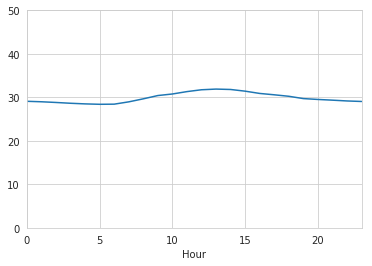

In [243]:
plt.axis([0, 23, 0, 50])
byMonth = data.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth #and grouped them together on the basis of hour
byMonth['Temperature  [2 m above gnd]'].plot()



now will take 3 cites which are nearest to the seas and 3 cites which are farthest 
3 cities nearest are mumbai ,navi mumbai, panvel  denoted  in black 
3 farthest are aurangabad ,kolhapur, dhule denoted in pink


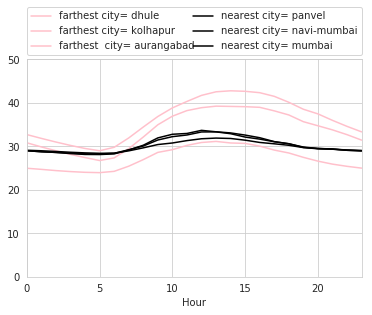

In [244]:
plt.axis([0, 23, 0, 50])
byMonth10['Temperature  [2 m above gnd]'].plot(color="pink",label ="farthest city= dhule" )#dhule city
byMonth9['Temperature  [2 m above gnd]'].plot(color="pink",label ="farthest city= kolhapur " )#kolhapur
byMonth7['Temperature  [2 m above gnd]'].plot(color="pink",label ="farthest  city= aurangabad"  )#aurangabad
byMonth5['Temperature  [2 m above gnd]'].plot(color="black",label ="nearest city= panvel")#panvel
byMonth4['Temperature  [2 m above gnd]'].plot(color="black",label ="nearest city= navi-mumbai"  )#navi mumbai
byMonth['Temperature  [2 m above gnd]'].plot(color="black" ,label ="nearest city= mumbai" )#mumbai
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)#legend to make sure 

In [245]:
#I have created a list all the maximum temperature of each city 
temp_max = [data10['Temperature  [2 m above gnd]'].max(),
            data9['Temperature  [2 m above gnd]'].max(),
            data8['Temperature  [2 m above gnd]'].max(),
            data7['Temperature  [2 m above gnd]'].max(),
            data6['Temperature  [2 m above gnd]'].max(),
            data5['Temperature  [2 m above gnd]'].max(),
            data4['Temperature  [2 m above gnd]'].max(),
            data2['Temperature  [2 m above gnd]'].max(),
            data1['Temperature  [2 m above gnd]'].max(),
            data['Temperature  [2 m above gnd]'].max()]
            

In [246]:
#I have created a list  of distance of each city from sea  
dis=[data10["distance from sea[km]"].mean(),
    data9["Distance from sea [km]"].mean(),
    data8["distance from sea[km]"].mean(),
    data7["distance from sea [km]"].mean(),
    data6["distance from sea[km]" ].mean(),
     data5["distance from sea [km]"].mean(),
     data4["distance from sea [km]"].mean(),
     data2["distance from sea [km]"].mean(),
    data1["distance from sea[km]"].mean(),
    data["distance from sea [km]"].mean()]


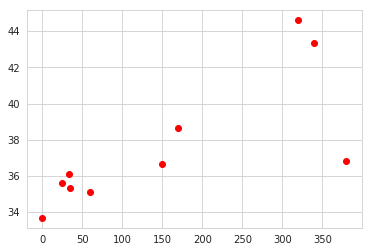

In [247]:
#ploted graph of distace vs maximum temperature 
plt.plot(dis,temp_max,'ro')
   

In [248]:
#I have created a list all the minimum temperature of each city 
temp_min = [data10['Temperature  [2 m above gnd]'].min(),
            data9['Temperature  [2 m above gnd]'].min(),
            data8['Temperature  [2 m above gnd]'].min(),
            data7['Temperature  [2 m above gnd]'].min(),
            data6['Temperature  [2 m above gnd]'].min(),
            data5['Temperature  [2 m above gnd]'].min(),
            data4['Temperature  [2 m above gnd]'].min(),
            data2['Temperature  [2 m above gnd]'].min(),
            data1['Temperature  [2 m above gnd]'].min(),
            data['Temperature  [2 m above gnd]'].min()]
            

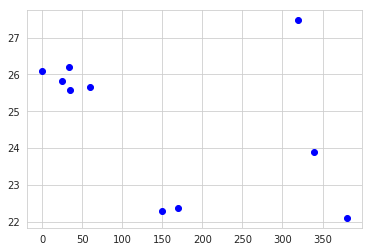

In [249]:
#ploted graph of distace vs minimum temperature 
plt.plot(dis,temp_min,'bo')

In [250]:
#created a dictionary of the maximum Temperature,distance and minimum Temperature so we can create a dataframe
dic = {"distance": [data10["distance from sea[km]"].mean(),
    data9["Distance from sea [km]"].mean(),
    data8["distance from sea[km]"].mean(),
    data7["distance from sea [km]"].mean(),
    data6["distance from sea[km]" ].mean(),
     data5["distance from sea [km]"].mean(),
     data4["distance from sea [km]"].mean(),
     data2["distance from sea [km]"].mean(),
    data1["distance from sea[km]"].mean(),
    data["distance from sea [km]"].mean()],
        "max_temperrature": [data10['Temperature  [2 m above gnd]'].max(),
            data9['Temperature  [2 m above gnd]'].max(),
            data8['Temperature  [2 m above gnd]'].max(),
            data7['Temperature  [2 m above gnd]'].max(),
            data6['Temperature  [2 m above gnd]'].max(),
            data5['Temperature  [2 m above gnd]'].max(),
            data4['Temperature  [2 m above gnd]'].max(),
            data2['Temperature  [2 m above gnd]'].max(),
            data1['Temperature  [2 m above gnd]'].max(),
            data['Temperature  [2 m above gnd]'].max()],
        "min_tempemperature":[data10['Temperature  [2 m above gnd]'].min(),
            data9['Temperature  [2 m above gnd]'].min(),
            data8['Temperature  [2 m above gnd]'].min(),
            data7['Temperature  [2 m above gnd]'].min(),
            data6['Temperature  [2 m above gnd]'].min(),
            data5['Temperature  [2 m above gnd]'].min(),
            data4['Temperature  [2 m above gnd]'].min(),
            data2['Temperature  [2 m above gnd]'].min(),
            data1['Temperature  [2 m above gnd]'].min(),
            data['Temperature  [2 m above gnd]'].min()]}
        

In [251]:
#data frame created
ak = pd.DataFrame(dic)

In [252]:
ak

,distance,max_temperrature,min_tempemperature
0,320.0,44.60,27.47
1,380.0,36.80,22.10
2,34.0,36.11,26.21
3,340.0,43.34,23.90
4,60.0,35.10,25.65
5,35.0,35.34,25.57
6,25.0,35.61,25.83
7,170.0,38.64,22.36
8,150.0,36.66,22.29
9,0.0,33.68,26.10


/home/ak/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


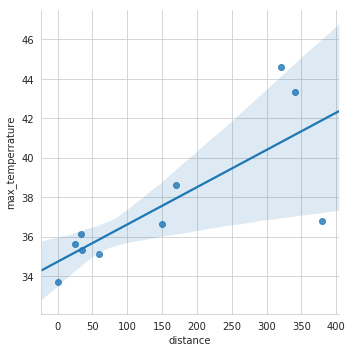

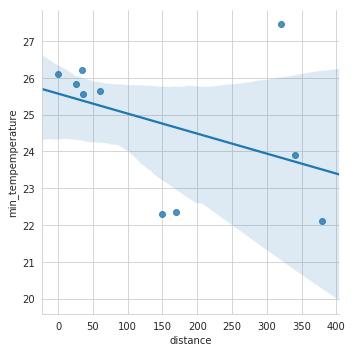

In [289]:
#drawn a regression line with the help of seaborn plot
sns.lmplot(x='distance',y='max_temperrature',data=ak)
sns.lmplot(x='distance',y="min_tempemperature",data=ak)

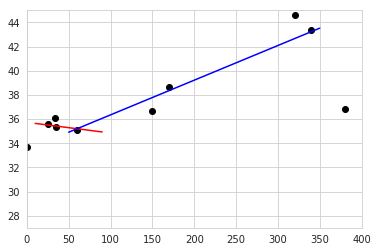

In [254]:

#calcluated regression and than plotted the graph
x = np.array(dis)#array of distance
y = np.array(temp_max)#array of maximum temperature 
x1 = x[x<100]
x1 = x1.reshape((x1.size,1))
y1 = y[x<100]
x2 = x[x>50]
x2 = x2.reshape((x2.size,1))
y2 = y[x>50]
from sklearn.svm import SVR
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)
svr_lin1.fit(x1, y1)
svr_lin2.fit(x2, y2)
xp1 = np.arange(10,100,10).reshape((9,1))
xp2 = np.arange(50,400,50).reshape((7,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)
plt.plot(xp1, yp1, c='r', label='Strong sea effect')
plt.plot(xp2, yp2, c='b', label='Light sea effect')
plt.axis((0,400,27,45))
plt.scatter(x, y, c='k', label='data')

In [255]:
byMonth = data.groupby('Hour').mean() # have taken mean of all days temperature,total precipitation,wind speed,wind direction
byMonth #and grouped them together on the basis of hour
byMonth['Relative Humidity  [2 m above gnd]'].plot #humidity is plotted vs time

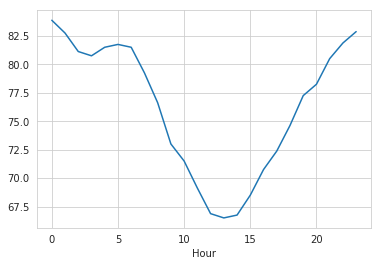

In [256]:
byMonth['Relative Humidity  [2 m above gnd]'].plot()#humidity is plotted vs time

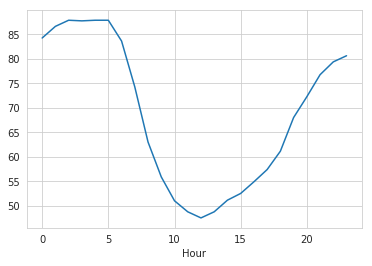

In [257]:
byMonth1['Relative Humidity  [2 m above gnd]'].plot()

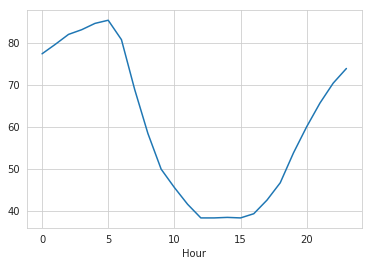

In [258]:
byMonth2['Relative Humidity  [2 m above gnd]'].plot()#humidity is plotted vs time

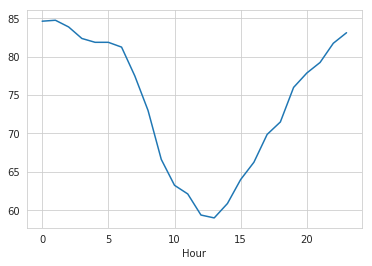

In [259]:
byMonth4['Relative Humidity  [2 m above gnd]'].plot()#humidity is plotted vs time

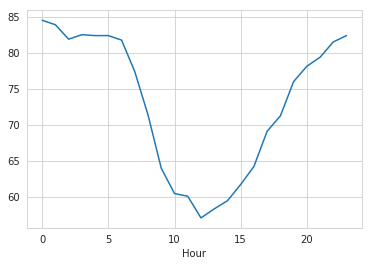

In [260]:
byMonth5['Relative Humidity  [2 m above gnd]'].plot()#humidity is plotted vs time

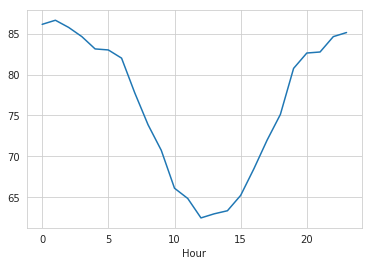

In [261]:
byMonth6['Relative Humidity  [2 m above gnd]'].plot()#humidity is plotted vs time

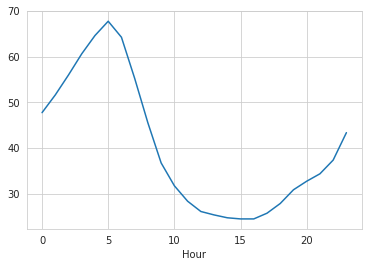

In [262]:
byMonth7['Relative Humidity  [2 m above gnd]'].plot()#humidity is plotted vs time

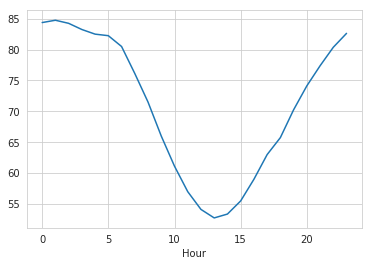

In [263]:
byMonth8['Relative Humidity  [2 m above gnd]'].plot()#humidity is plotted vs time

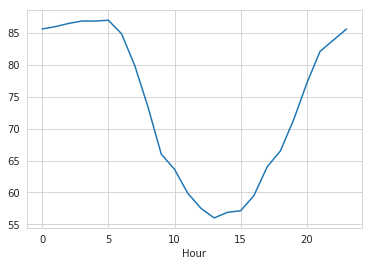

In [264]:
byMonth9['Relative Humidity  [2 m above gnd]'].plot()#humidity is plotted vs time

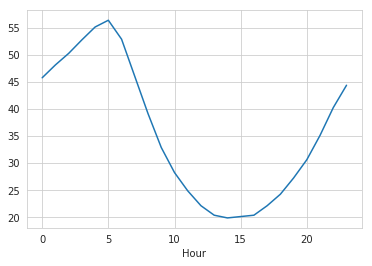

In [265]:
byMonth10['Relative Humidity  [2 m above gnd]'].plot()#humidity is plotted vs time

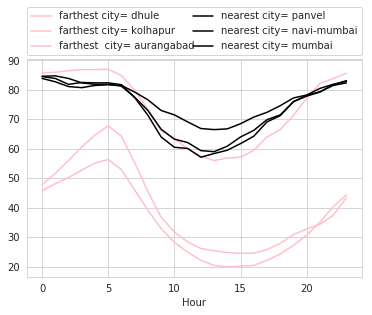

In [291]:
byMonth10['Relative Humidity  [2 m above gnd]'].plot(color="pink",label ="farthest city= dhule" )
byMonth9['Relative Humidity  [2 m above gnd]'].plot(color="pink",label ="farthest city= kolhapur " )
byMonth7['Relative Humidity  [2 m above gnd]'].plot(color="pink",label ="farthest  city= aurangabad"  )
byMonth5['Relative Humidity  [2 m above gnd]'].plot(color="black",label ="nearest city= panvel")
byMonth4['Relative Humidity  [2 m above gnd]'].plot(color="black",label ="nearest city= navi-mumbai"  )
byMonth['Relative Humidity  [2 m above gnd]'].plot(color="black" ,label ="nearest city= mumbai" )
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

In [267]:
#created a dictionary of the maximum Temperature,distance and minimum Temperature so we can create a dataframe
humid_dic = {"distance": [data10["distance from sea[km]"].mean(),
    data9["Distance from sea [km]"].mean(),
    data8["distance from sea[km]"].mean(),
    data7["distance from sea [km]"].mean(),
    data6["distance from sea[km]" ].mean(),
     data5["distance from sea [km]"].mean(),
     data4["distance from sea [km]"].mean(),
     data2["distance from sea [km]"].mean(),
    data1["distance from sea[km]"].mean(),
    data["distance from sea [km]"].mean()],
        "max_humidity": [data10['Relative Humidity  [2 m above gnd]'].max(),
            data9['Relative Humidity  [2 m above gnd]'].max(),
            data8['Relative Humidity  [2 m above gnd]'].max(),
            data7['Relative Humidity  [2 m above gnd]'].max(),
            data6['Relative Humidity  [2 m above gnd]'].max(),
            data5['Relative Humidity  [2 m above gnd]'].max(),
            data4['Relative Humidity  [2 m above gnd]'].max(),
            data2['Relative Humidity  [2 m above gnd]'].max(),
            data1['Relative Humidity  [2 m above gnd]'].max(),
            data['Relative Humidity  [2 m above gnd]'].max()],
        "min_humidity":[data10['Relative Humidity  [2 m above gnd]'].min(),
            data9['Relative Humidity  [2 m above gnd]'].min(),
            data8['Relative Humidity  [2 m above gnd]'].min(),
            data7['Relative Humidity  [2 m above gnd]'].min(),
            data6['Relative Humidity  [2 m above gnd]'].min(),
            data5['Relative Humidity  [2 m above gnd]'].min(),
            data4['Relative Humidity  [2 m above gnd]'].min(),
            data2['Relative Humidity  [2 m above gnd]'].min(),
            data1['Relative Humidity  [2 m above gnd]'].min(),
            data['Relative Humidity  [2 m above gnd]'].min()]}

In [268]:
ck = pd.DataFrame(humid_dic)#created a dataframe

In [269]:
ck

,distance,max_humidity,min_humidity
0,320.0,78,11
1,380.0,93,34
2,34.0,91,45
3,340.0,77,14
4,60.0,93,54
5,35.0,93,50
6,25.0,93,50
7,170.0,90,25
8,150.0,93,32
9,0.0,89,60


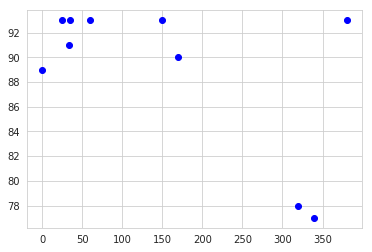

In [270]:
plt.plot(ck["distance"],ck["max_humidity"],'bo')#graph plotted between distance vs maximum humidity

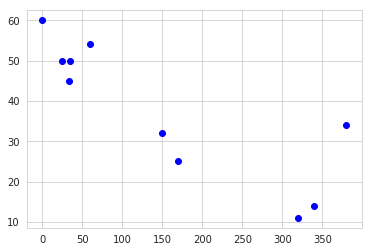

In [271]:
plt.plot(ck["distance"],ck["min_humidity"],'bo')#graph plotted between distance vs minimum humidity

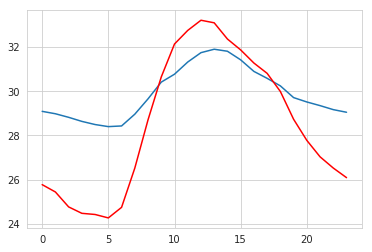

In [272]:
y10 = byMonth['Temperature  [2 m above gnd]']
x10 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y20= byMonth1['Temperature  [2 m above gnd]']
x20 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
fig,ax = plt.subplots()
ax.plot(x10,y10,x20,y20,'r')

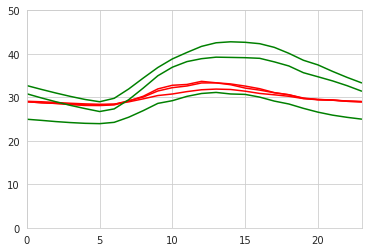

In [287]:
plt.axis([0, 23, 0, 50])
y1 = byMonth['Temperature  [2 m above gnd]']
x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y2=  byMonth4['Temperature  [2 m above gnd]']
x2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y3 = byMonth5['Temperature  [2 m above gnd]']
x3 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y4= byMonth9['Temperature  [2 m above gnd]']
x4= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y5= byMonth10['Temperature  [2 m above gnd]']
x5= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y6= byMonth7['Temperature  [2 m above gnd]']
x6= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')


In [293]:
b=np.array([[1.2,1,2],[0.4,4.5]])

In [295]:
np.arange(0,12,3)

array([0, 3, 6, 9])

In [298]:
f=np.array([[1,2,3],[4,5,6]],dtype=complex)

In [299]:
f

array([[1.+0.j, 2.+0.j, 3.+0.j],
       [4.+0.j, 5.+0.j, 6.+0.j]])

As you can certainly see that the humidity is higher,both the minimum and maximum, in the city closest to the sea. However, in my opinion, it is not possible to say that there is a linear relationship or some otherkind of relation to draw a curve. The collected points (10) are too few to highlighta trend in this case.